In [72]:
import pandas as pd
import numpy as np
from google import generativeai as genai
from dotenv import load_dotenv
import os
from matplotlib import pyplot as plt
import warnings
import sys

In [73]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
auto = pd.read_csv("data/inputs/npg/auto-mpg.data", header=None, delim_whitespace=True)
auto.head(10)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [74]:
variable_names = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model_year',
    'origin',
    'car_name'
]

auto.columns = variable_names
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [75]:
#counting all null value('?') in a column
for i in auto.columns:
    print(f"{i} : {sum('?' == auto[i])} null values")

mpg : 0 null values
cylinders : 0 null values
displacement : 0 null values
horsepower : 6 null values
weight : 0 null values
acceleration : 0 null values
model_year : 0 null values
origin : 0 null values
car_name : 0 null values


In [76]:
#replacing '?' with 150
auto['horsepower'] = auto['horsepower'].replace('?', 150)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [77]:
auto['horsepower'] = auto['horsepower'].astype(float)
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [78]:
# Read Excel file
df = pd.read_excel('data/inputs/iris.xls')

# Specify sheet name
#df = pd.read_excel('data/inputs/SampleSuperstore.xlsx', sheet_name='Sheet1')

df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class,NaN,NaN,alpha,obj,NaN,NaN
1,NaN,7,3.2,4.7,1.4,Iris-versicolor,NaN,0.0,0,0,0.0,1.0
2,NaN,6.4,3.2,4.5,1.5,Iris-versicolor,NaN,0.0,NaN,NaN,0.0,1.0
3,NaN,6.9,3.1,4.9,1.5,Iris-versicolor,NaN,0.0,NaN,NaN,0.0,1.0
4,NaN,5.5,2.3,4,1.3,Iris-versicolor,NaN,0.0,NaN,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,4.8,3,1.4,0.3,Iris-setosa,NaN,NaN,NaN,NaN,0.0,1.0
97,NaN,5.1,3.8,1.6,0.2,Iris-setosa,NaN,NaN,NaN,NaN,0.0,1.0
98,NaN,4.6,3.2,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,0.0,1.0
99,NaN,5.3,3.7,1.5,0.2,Iris-setosa,NaN,NaN,NaN,NaN,0.0,1.0


In [79]:
# Create DataFrame from dictionary
employee_data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank'],
    'Age': [25, 30, 35, 28, 22, 40],
    'Salary': [50000, 60000, 60000, 50000, 70000, 60000],
    'Department': ['IT', 'Finance', 'IT', 'Marketing', 'HR', 'Finance']
}

df = pd.DataFrame(employee_data)
df

,Name,Age,Salary,Department
0,Alice,25,50000,IT
1,Bob,30,60000,Finance
2,Charlie,35,60000,IT
3,Diana,28,50000,Marketing
4,Eve,22,70000,HR
5,Frank,40,60000,Finance


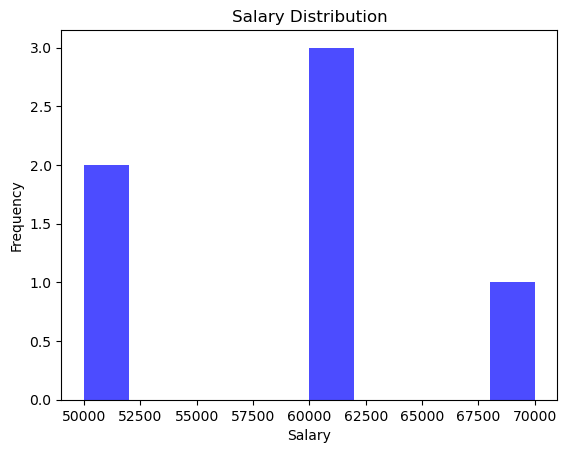

In [80]:
#plotting a histogram df['Salary']
plt.hist(df['Salary'], bins=10, color='blue',
         alpha=0.7)  #bin is the number of intervals and alpha is the transparency of the bars
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

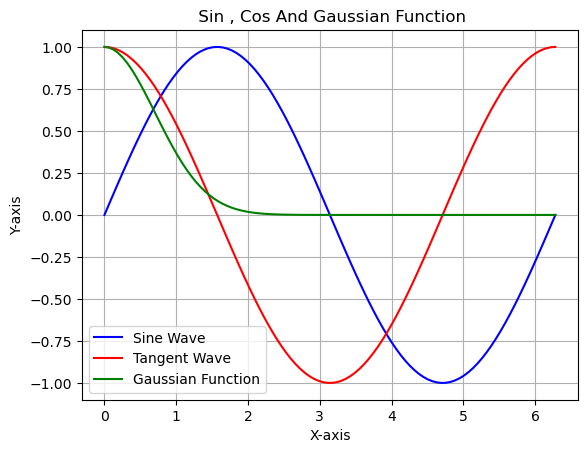

In [81]:
#ploting sin , cos and gaussian function
x = np.linspace(0, 2 * np.pi, 100)  # Generate 100 points between 0 and 2π
y = np.sin(x)  # Calculate the sine of each point
cos_y = np.cos(x)  # Calculate the tangent of each point
gaussian_y = np.exp(-x ** 2)  # Calculate the Gaussian function for each point
# tangent with -1 to 1 range
tx = np.linspace(-10, 10, 400)
plt.plot(x, y, label='Sine Wave', color='blue')  # Plot sine wave
plt.plot(x, cos_y, label='Tangent Wave', color='red')  # Plot tangent
plt.plot(x, gaussian_y, label='Gaussian Function', color='green')  # Plot Gaussian function
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(' sin , cos and gaussian function'.title())
plt.legend()
plt.grid(True)
plt.show()

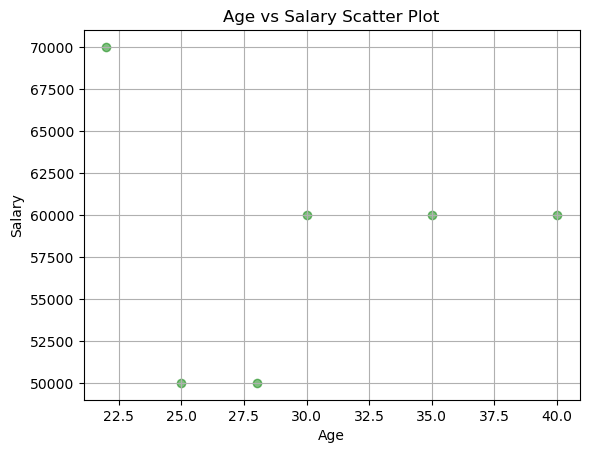

In [82]:
#Scatter plot
plt.scatter(df['Age'], df['Salary'], color='green', alpha=0.5)  # Scatter plot of Age vs Salary
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary Scatter Plot')
plt.grid(True)
plt.show()

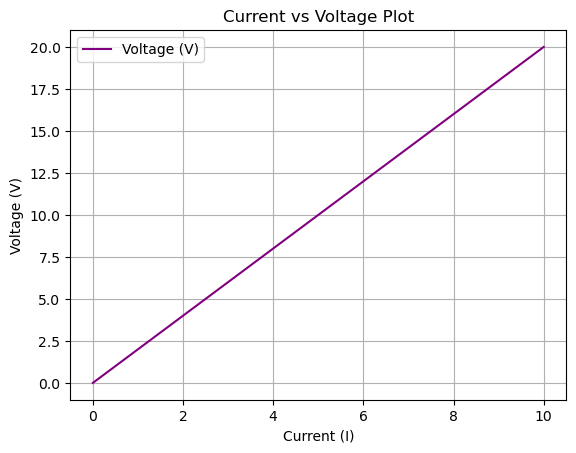

In [83]:
#plotting current and voltage graph
x = np.linspace(0, 10, 100)  # Generate 100 points between 0 and 10
#V=IR #Assuming R=2 ohm
R = 2
y = [i * R for i in x]  # Calculate voltage for each current value
plt.plot(x, y, label='Voltage (V)', color='purple')  # Plot voltage
plt.xlabel('Current (I)')
plt.ylabel('Voltage (V)')
plt.title('Current vs Voltage Plot')
plt.legend()
plt.grid(True)
plt.show()


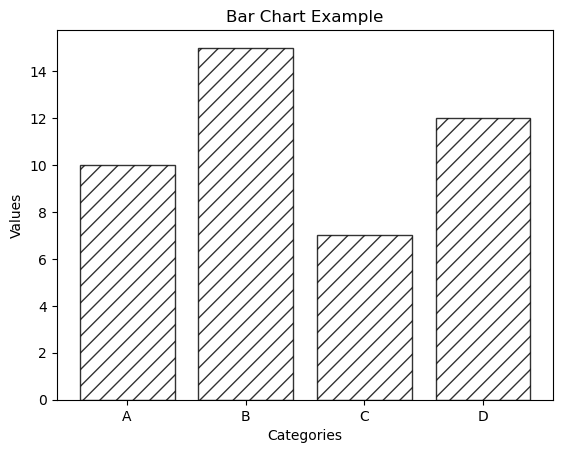

In [84]:
#plotting a bar chart
categories = ['A', 'B', 'C', 'D']
values = [10, 15, 7, 12]
#with added style
plt.bar(categories, values, color='white', edgecolor='black', alpha=0.8, hatch='//')  # Bar chart with custom style
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')
plt.show()

ValueError: Invalid RGBA argument: 'lightpurple'

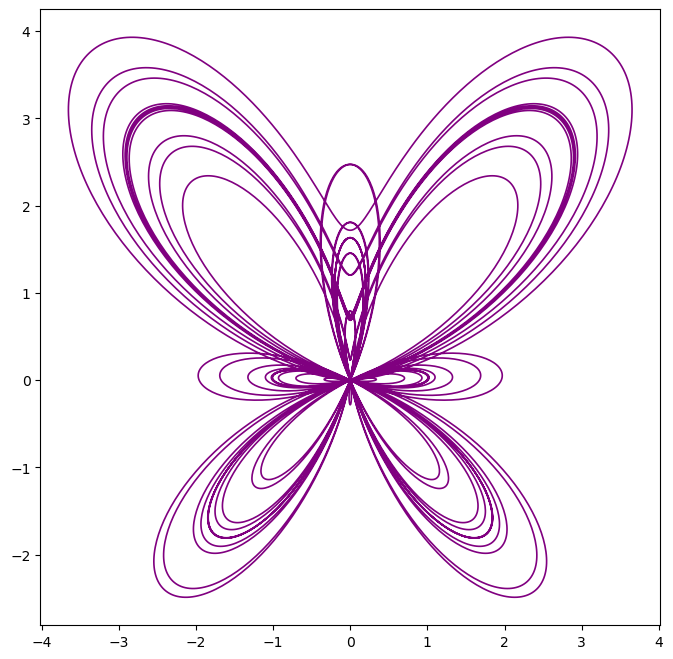

In [86]:
# Butterfly curve
t = np.linspace(0, 24 * np.pi, 10000)
x = np.sin(t) * (np.exp(np.cos(t)) - 2 * np.cos(4 * t) - (np.sin(t / 12)) ** 5)
y = np.cos(t) * (np.exp(np.cos(t)) - 2 * np.cos(4 * t) - (np.sin(t / 12)) ** 5)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x, y, color="purple", linewidth=1.2)
plt.fill(x, y, color="lightpurple", alpha=0.5)  # Fill the area for better visibility
plt.title("Butterfly Curve", fontsize=16, weight="bold", color="darkblue")
plt.axis("equal")  # Equal scaling for symmetry
plt.axis("off")  # Hide axes for clean look
plt.show()

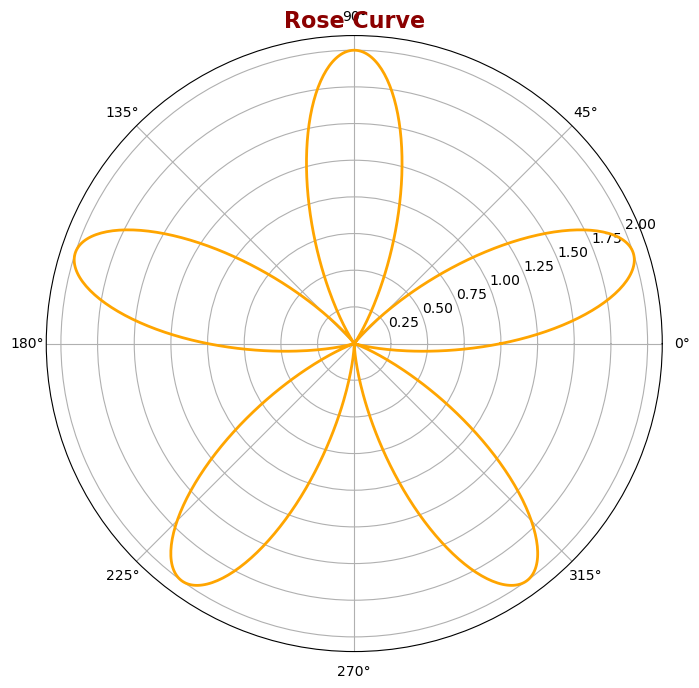

In [87]:
# rose curve
theta = np.linspace(0, 2 * np.pi, 1000)
r = 1 + np.sin(5 * theta)  # Rose curve with 5
plt.figure(figsize=(8, 8))
plt.polar(theta, r, color='orange', linewidth=2)
plt.title('Rose Curve', fontsize=16, weight='bold', color='darkred')
plt.grid(True)
plt.show()

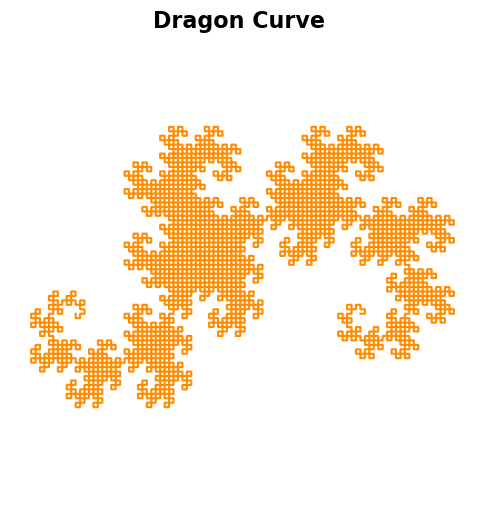

In [88]:
# Simple dragon curve via L-system
def dragon_curve(n):
    seq = "FX"
    rules = {"X": "X+YF+", "Y": "-FX-Y"}
    for _ in range(n):
        seq = "".join(rules.get(c, c) for c in seq)
    return seq


def draw(seq):
    x, y, angle = [0], [0], 0
    step = 5
    for cmd in seq:
        if cmd == "F":
            x.append(x[-1] + step * np.cos(np.radians(angle)))
            y.append(y[-1] + step * np.sin(np.radians(angle)))
        elif cmd == "+":
            angle += 90
        elif cmd == "-":
            angle -= 90
    return x, y


seq = dragon_curve(12)  # iterations
x, y = draw(seq)

plt.figure(figsize=(6, 6))
plt.plot(x, y, color="darkorange")
plt.title("Dragon Curve ", fontsize=16, weight="bold")
plt.axis("equal")
plt.axis("off")
plt.show()

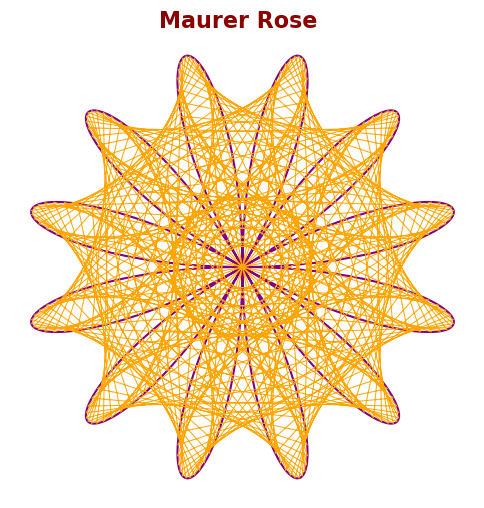

In [89]:

n, d = 6, 71  # parameters
t = np.linspace(0, 360, 1000) * np.pi / 180
r = np.sin(n * t)

x = r * np.cos(t)
y = r * np.sin(t)

# Maurer lines
x_maurer = []
y_maurer = []
for k in range(361):
    theta = np.deg2rad(k * d)
    r = np.sin(n * theta)
    x_maurer.append(r * np.cos(theta))
    y_maurer.append(r * np.sin(theta))

plt.figure(figsize=(6, 6))
plt.plot(x, y, color="purple")
plt.plot(x_maurer, y_maurer, color="orange", linewidth=0.7)
plt.title("Maurer Rose ", fontsize=16, weight="bold", color="darkred")
plt.axis("equal")
plt.axis("off")
plt.show()

In [91]:
# Load environment variables from .env file
load_dotenv()

# Access the environment variable
api_key = os.getenv('GEMINI_API_KEY')

# Initialize the Generative AI client
genai.configure(api_key=api_key)
model = genai.GenerativeModel(model_name="gemini-1.5-flash")
chat = model.start_chat()
response = chat.send_message("Hare Krishna, how are you?")
print(response.text)

Hare Krishna!  I am doing well, thank you for asking.  How are you today?

